In [32]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import random
import pylab as pl

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from ipyparallel import Client

In [33]:
rc = Client()
print(rc.ids)
%matplotlib inline

[0, 1, 2, 3, 4, 5, 6, 7]


Exemplo simples

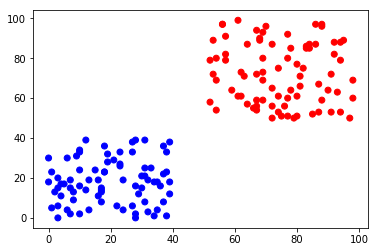

In [34]:
def generate_data(blue, red, test_size=0.2, func=lambda x: x):
    
    blue_x = np.vectorize(func)(np.random.randint(*blue[0]))
    blue_y = np.vectorize(func)(np.random.randint(*blue[1]))
    red_x = np.vectorize(func)(np.random.randint(*red[0]))
    red_y = np.vectorize(func)(np.random.randint(*red[1]))
    
    blue_vals = np.dstack((blue_x, blue_y, ["blue" for _ in blue_x]))[0]
    red_vals = np.dstack((red_x, red_y, ["red" for _ in red_x]))[0]
    
    X = np.append(blue_vals, red_vals, axis=0)
    
    Y = [1 for _ in range(len(blue_vals))]
    Y.extend([0 for _ in range(len(red_vals))])
    
    return train_test_split(X, Y, test_size=test_size)

def plot_confusion_matrix(y_true, y_predicted):
    plt.matshow(confusion_matrix(y_true, y_predicted), cmap=plt.cm.binary, interpolation='nearest')
    plt.title('confusion matrix')
    plt.colorbar()
    plt.ylabel('expected label')
    plt.xlabel('predicted label')
    

def scatterRandomPoints(x, y, color=None, ):
    y_vals = np.random.randint(*y)
    x_vals = np.random.randint(*x)
    plt.scatter(x_vals, y_vals, c=color)
    return np.dstack((x_vals, y_vals))[0]
# azul = scatterRandomPoints([0, 40, 50], [0, 40, 50])
# vermelho = scatterRandomPoints([50, 100, 50], [50, 100, 50], color="red")


X_train, X_test, y_train, y_test = generate_data([[0, 40, 100], [0, 40, 100]], [[50, 100, 100], [50, 100, 100]])

plt.scatter(X_train[:, 0], X_train[:, 1], c=X_train[:, 2])

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       1.00      1.00      1.00        21

avg / total       1.00      1.00      1.00        40



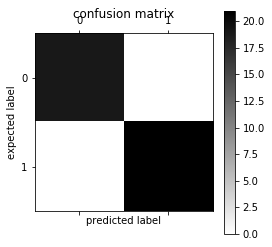

In [35]:
clf = DecisionTreeClassifier()
clf.fit(X_train[:, :2].astype(np.int), y_train)
print(classification_report(y_test, clf.predict(X_test[:, :2].astype(np.int))))
plot_confusion_matrix(y_test, clf.predict(X_test[:, :2].astype(np.int)))

In [36]:
def plot_decision_boundary(clf, X):
    h = .02
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].astype(np.float).min() - 1, X[:, 0].astype(np.float).max() + 1
    y_min, y_max = X[:, 1].astype(np.float).min() - 1, X[:, 1].astype(np.float).max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    print("predicting")
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    print("predicted")
    print("length", len(Z))

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    print("colormesh")

    # Plot also the training points
    plt.scatter(X[:, 0].astype(np.float), X[:, 1].astype(np.float), c=X[:, 2])
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()
    print("Showing")


predicting
predicted
length 25250000
colormesh


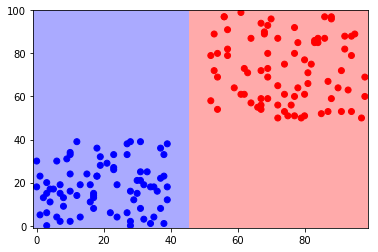

Showing
CPU times: user 22.2 s, sys: 1.83 s, total: 24 s
Wall time: 24 s


In [37]:
%time plot_decision_boundary(clf, X_train)

exemplo mais real life

             precision    recall  f1-score   support

          0       0.95      0.92      0.93        59
          1       0.85      0.90      0.88        31

avg / total       0.91      0.91      0.91        90

predicting
predicted
length 25502500
colormesh


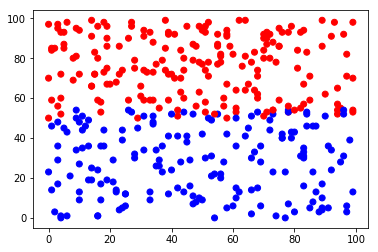

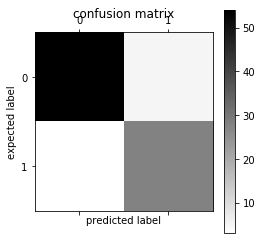

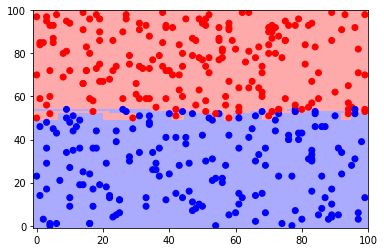

Showing
CPU times: user 21.7 s, sys: 1.8 s, total: 23.6 s
Wall time: 23.6 s


In [38]:
X_train, X_test, y_train, y_test = generate_data([[0, 100, 200], [0, 55, 200]], [[00, 100, 250], [50, 100, 250]])

plt.scatter(X_train[:, 0], X_train[:, 1], c=X_train[:, 2])

clf = DecisionTreeClassifier()
clf.fit(X_train[:, :2].astype(np.int), y_train)
print(classification_report(y_test, clf.predict(X_test[:, :2].astype(np.int))))
plot_confusion_matrix(y_test, clf.predict(X_test[:, :2].astype(np.int)))
%time plot_decision_boundary(clf, X_train)

exemplo ainda mais real life

             precision    recall  f1-score   support

          0       0.81      0.73      0.77        52
          1       0.67      0.76      0.72        38

avg / total       0.75      0.74      0.75        90

predicting
predicted
length 25502500
colormesh


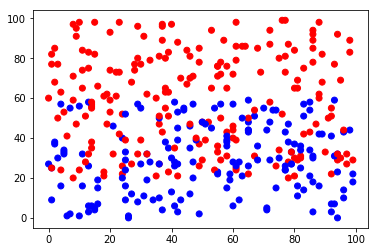

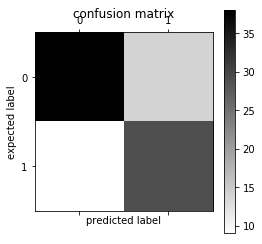

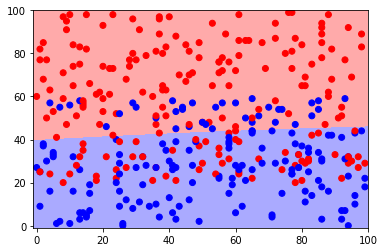

Showing
CPU times: user 23.4 s, sys: 3.39 s, total: 26.8 s
Wall time: 26.8 s


In [39]:
X_train, X_test, y_train, y_test = generate_data([[0, 100, 200], [0, 60, 200]], [[00, 100, 250], [20, 100, 250]])

plt.scatter(X_train[:, 0], X_train[:, 1], c=X_train[:, 2])

clf = GaussianNB()
clf.fit(X_train[:, :2].astype(np.int), y_train)
print(classification_report(y_test, clf.predict(X_test[:, :2].astype(np.int))))
plot_confusion_matrix(y_test, clf.predict(X_test[:, :2].astype(np.int)))
%time plot_decision_boundary(clf, X_train)

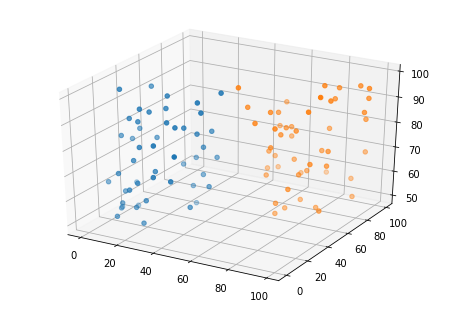

In [40]:
fig = plt.figure()
ax = Axes3D(fig)

sequence_containing_x_vals = list(range(0, 50))
sequence_containing_y_vals = list(range(0, 50))
sequence_containing_z_vals = list(range(50, 100))

random.shuffle(sequence_containing_x_vals)
random.shuffle(sequence_containing_y_vals)
random.shuffle(sequence_containing_z_vals)

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
sequence_containing_x_vals = list(range(50, 100))
sequence_containing_y_vals = list(range(50, 100))
sequence_containing_z_vals = list(range(50, 100))

random.shuffle(sequence_containing_x_vals)
random.shuffle(sequence_containing_y_vals)
random.shuffle(sequence_containing_z_vals)

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)

# sequence_containing_x_vals = list(range(50, 100))
# sequence_containing_y_vals = list(range(0, 50))
# sequence_containing_z_vals = list(range(0, 50))

# random.shuffle(sequence_containing_x_vals)
# random.shuffle(sequence_containing_y_vals)
# random.shuffle(sequence_containing_z_vals)

# ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)


In [41]:
def generate_circular_data(min_radius, med_radius, max_radius, d1=100, d2=100, test_size=0.2, func=lambda x: x):
    
    x1 = np.random.uniform(-min_radius, min_radius, d1)
    y1 = []
    for i in x1:
        yy = np.random.uniform(0, sqrt(min_radius**2 - i**2))
        if random.choice([True, False]):
            yy = -yy
        y1.append(yy)

    x2 = np.random.uniform(-max_radius, max_radius, d2)
    y2 = []
    for i in x2:
        low = sqrt(med_radius**2 - i**2) if med_radius**2 - i**2 > 0 else 0
        yy = np.random.uniform(low, sqrt(max_radius**2 - i**2))
        if random.choice([True, False]):
            yy = -yy
        y2.append(yy)
    
    blue_vals = np.dstack((np.vectorize(func)(x1), np.vectorize(func)(y1), ["blue" for _ in x1]))[0]
    red_vals = np.dstack((np.vectorize(func)(x2), np.vectorize(func)(y2), ["red" for _ in x2]))[0]
    
    X = np.append(blue_vals, red_vals, axis=0)
    
    Y = [1 for _ in range(len(blue_vals))]
    Y.extend([0 for _ in range(len(red_vals))])
    
    return train_test_split(X, Y, test_size=test_size)

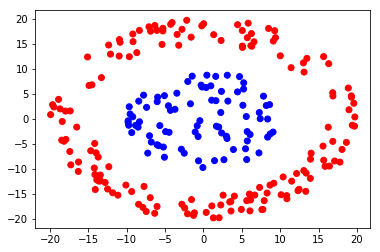

In [42]:
X_train, X_test, y_train, y_test = generate_circular_data(10, 15, 20, 100, 200)

plt.scatter(X_train[:, 0], X_train[:, 1], c=X_train[:, 2])

             precision    recall  f1-score   support

          0       0.86      1.00      0.92        42
          1       1.00      0.61      0.76        18

avg / total       0.90      0.88      0.87        60

predicting
predicted
length 4318059
colormesh


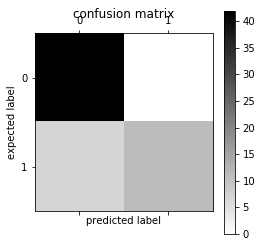

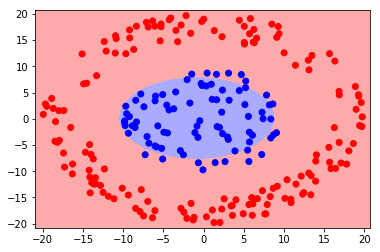

Showing
CPU times: user 4.09 s, sys: 624 ms, total: 4.71 s
Wall time: 4.7 s


In [43]:
clf = GaussianNB()
clf.fit(X_train[:, :2].astype(np.float), y_train)
print(classification_report(y_test, clf.predict(X_test[:, :2].astype(np.float))))
plot_confusion_matrix(y_test, clf.predict(X_test[:, :2].astype(np.float)))
%time plot_decision_boundary(clf, X_train)

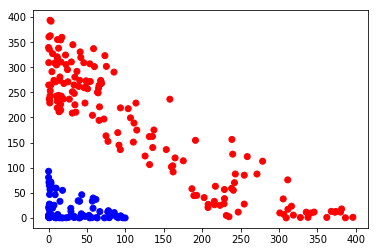

In [44]:
square = lambda x: x**2

X_train, X_test, y_train, y_test = generate_circular_data(10, 15, 20, 100, 200, func=square)

plt.scatter(X_train[:, 0], X_train[:, 1], c=X_train[:, 2])

             precision    recall  f1-score   support

          0       0.96      1.00      0.98        43
          1       1.00      0.88      0.94        17

avg / total       0.97      0.97      0.97        60

predicting
predicted
length 393879656
colormesh


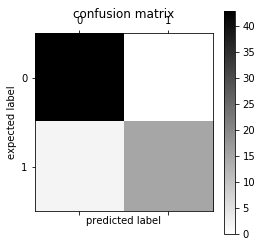

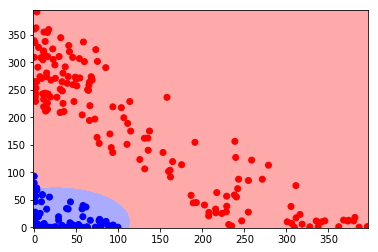

Showing
CPU times: user 7min 22s, sys: 4min 54s, total: 12min 16s
Wall time: 1h 57min 2s


In [45]:
clf = GaussianNB()
clf.fit(X_train[:, :2].astype(np.float), y_train)
print(classification_report(y_test, clf.predict(X_test[:, :2].astype(np.float))))
plot_confusion_matrix(y_test, clf.predict(X_test[:, :2].astype(np.float)))
%time plot_decision_boundary(clf, X_train)